In [1]:
## importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
## drop day , moth, year column
df = df.drop(["day","month","year"],axis="columns")

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
## Encoding
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
## Dividing Independent and Dependent features 
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [10]:
## train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [12]:
y_train.shape,y_test.shape

((182,), (61,))

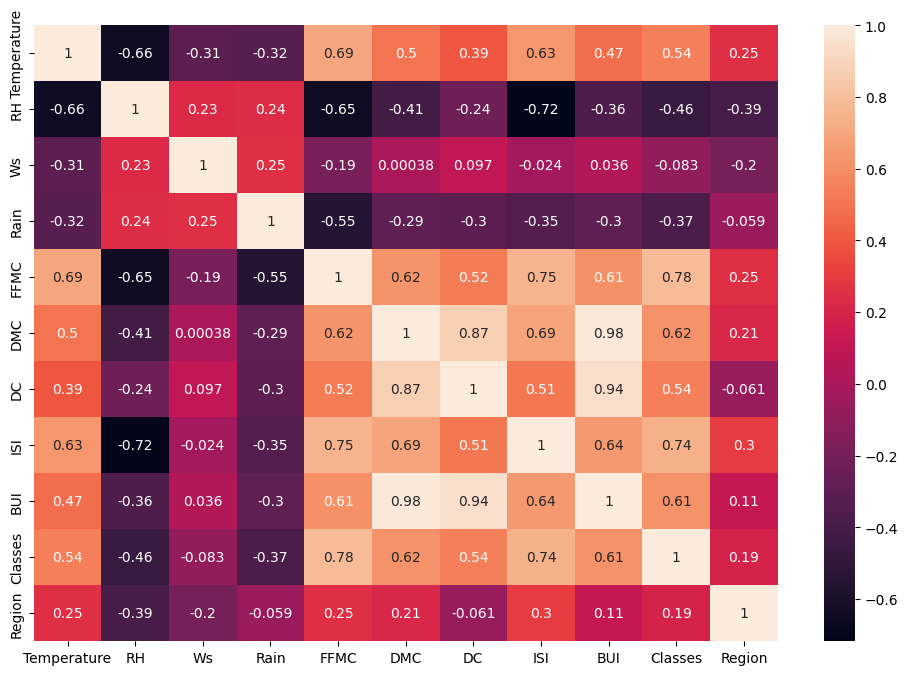

In [13]:
## Feature selection based on correlation
## Checking for multicollinearity 
## multicollinearity - when two input features are highly correlated , it raises the concept of  multicollinearity , to resolve 
## this we drop one of the column that is highly correlated
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [14]:
def correlation(df,threshold):
    column_corr = set()  ## to store columns 
    corr_matrix = df.corr() ## loading dataset correlation 
    for i in range(len(corr_matrix.columns)): ## iterating through each column
        for j in range(i): ## iterating through each row 
            if abs(corr_matrix.iloc[i,j] > threshold): ## comparing [row,column] index with threshold
                colname = corr_matrix.columns[i] ## storing columns
                column_corr.add(colname) ## adding columns 
    return column_corr ## returning columns 

In [15]:
## threshold value - it is mainly decided by Domain expert 
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [16]:
## dropping features whose correlation is more than 0.85 threshold value 
X_train = X_train.drop(["BUI","DC"],axis=1)
X_train.shape

(182, 9)

In [17]:
X_test = X_test.drop(["BUI","DC"],axis=1)
X_test.shape

(61, 9)

In [18]:
## Standardization - only on input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [20]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

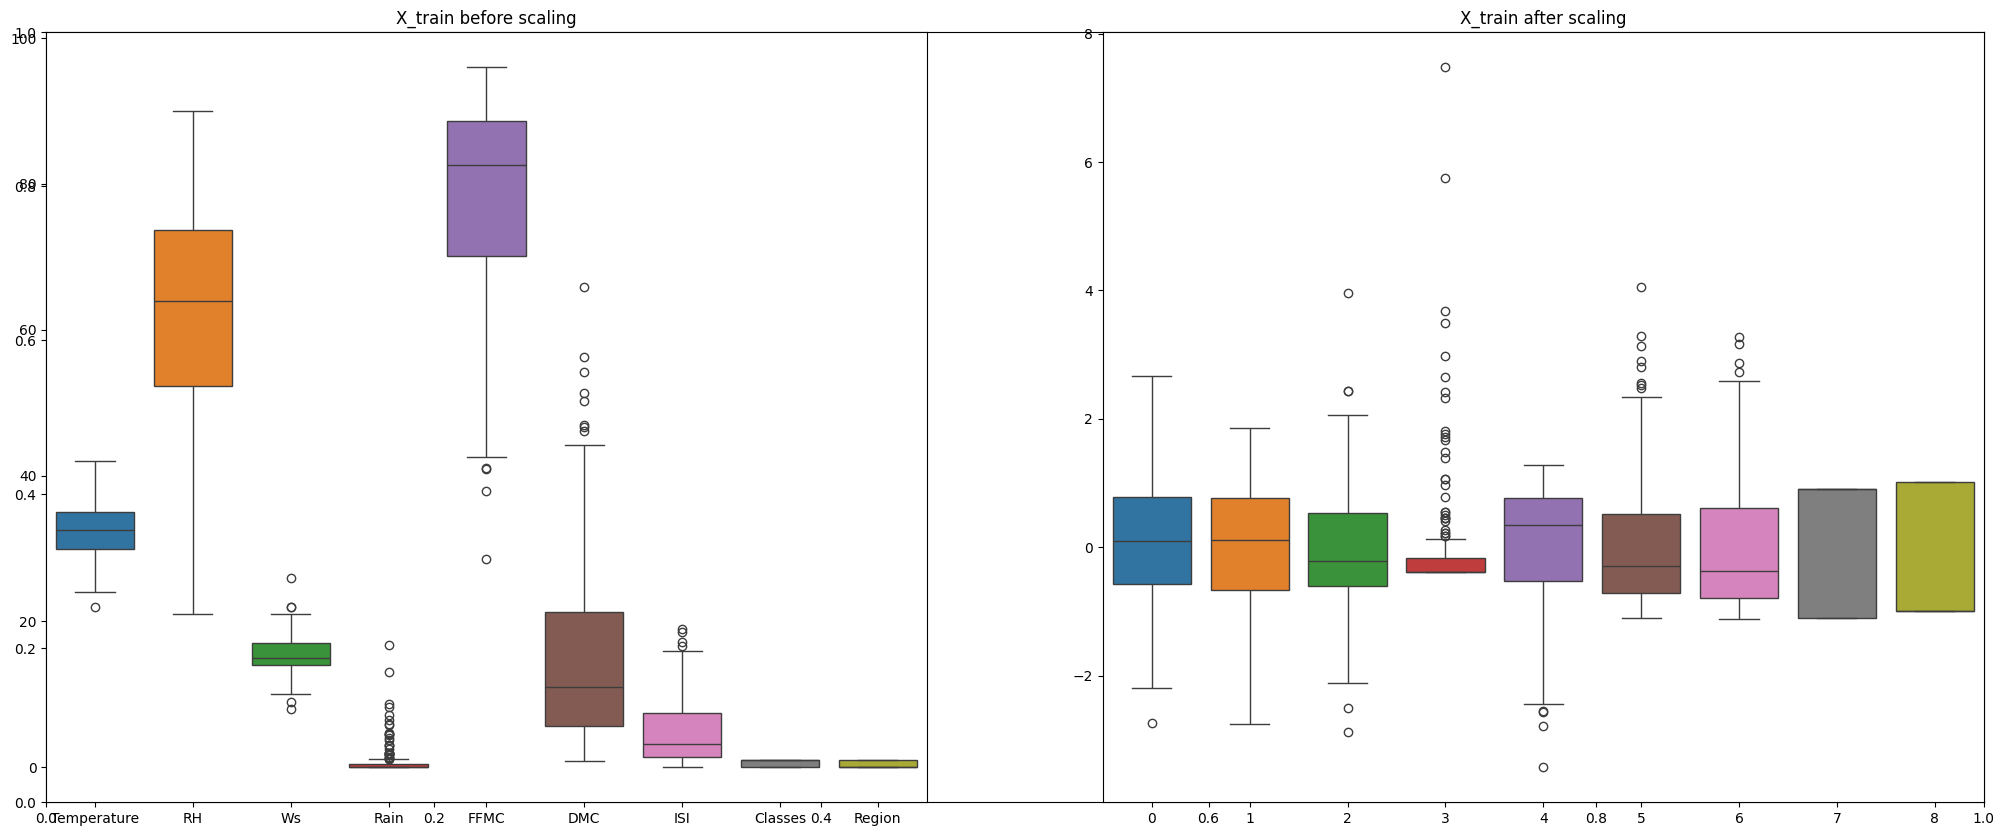

In [21]:
## Box plot to understand effect of Standard Scaler 
plt.subplots(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train after scaling")
plt.show()

mae =  0.546823646524997
mse =  0.6742766873791582
rmse =  0.8211435242265254
score =  0.9847657384266951


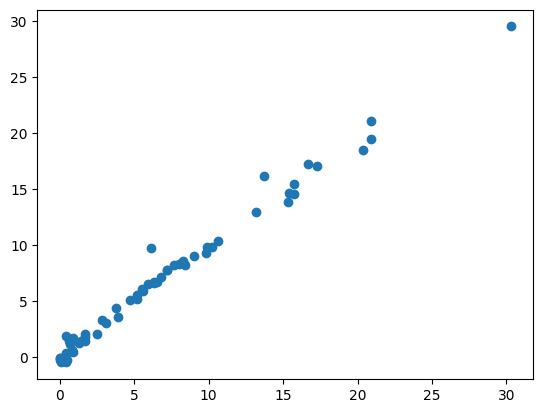

In [22]:
## applying Linear Regression Model 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("mse = ",mse)
print("rmse = ",rmse)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

mae =  1.133175994914409
mse =  2.248345891897477
rmse =  1.4994485292591662
score =  0.9492020263112388


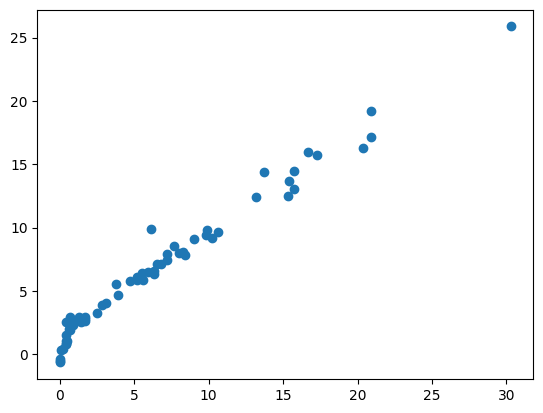

In [27]:
## applying Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("mse = ",mse)
print("rmse = ",rmse)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

mae =  0.6199701158263431
mse =  0.7924995554743625
rmse =  0.8902244410677357
score =  0.9820946715928275


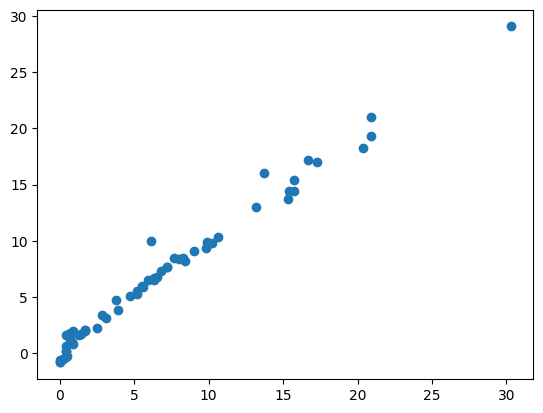

In [24]:
## Cross validation Lasso
## applying Lasso Regression
from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
y_pred = lassocv.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("mse = ",mse)
print("rmse = ",rmse)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [25]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [26]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

mae =  0.5642305340105691
score =  0.9842993364555513


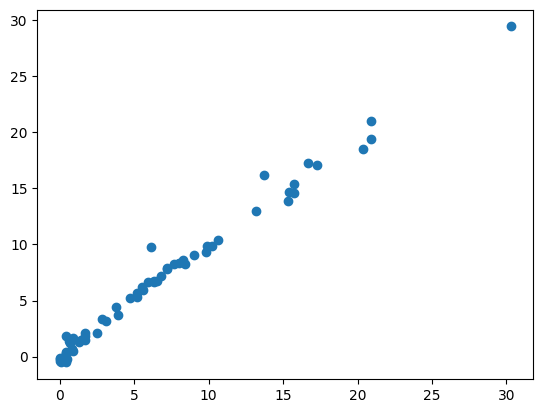

In [28]:
## applying Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

mae =  0.5642305340105691
score =  0.9842993364555513


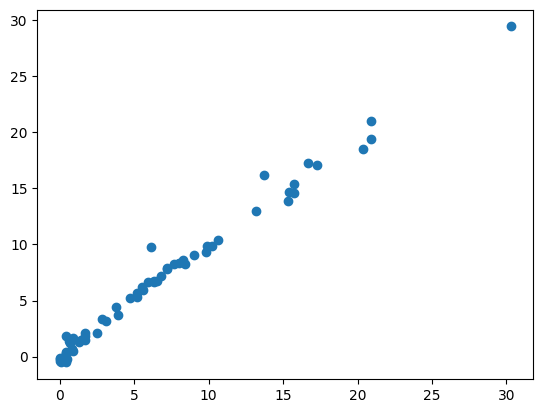

In [31]:
## applying Ridge cross validation
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [33]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

mae =  1.8822353634896
score =  0.8753460589519703


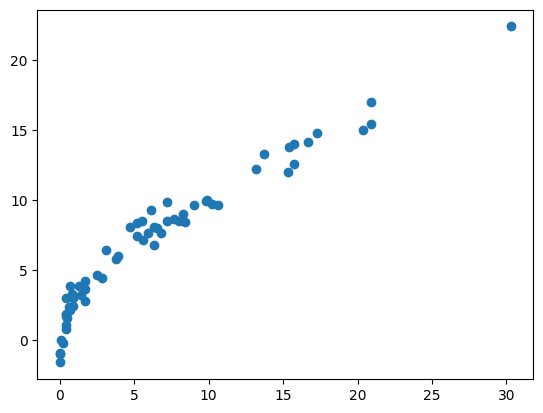

In [34]:
## applying ElasticNet Regression
from sklearn.linear_model import ElasticNet
elsatic_net = ElasticNet()
elsatic_net.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = elsatic_net.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

mae =  0.6575946731430901
score =  0.9814217587854941


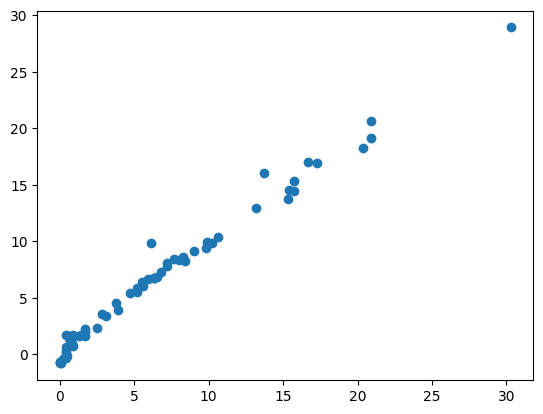

In [35]:
## applying ElasticNet Regression CV
from sklearn.linear_model import ElasticNetCV
elsatic_net_CV = ElasticNetCV(cv=5)
elsatic_net_CV.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = elsatic_net_CV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae = ",mae)
print("score = ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [36]:
## Model Pickling 
## Pickling the Machine Learning model , preprocessing model for standard scaler 
## Select the model with highest accuracy - Ridge in this case (98% accuracy)

In [37]:
scaler 

StandardScaler()

In [38]:
ridge

Ridge()

In [39]:
import pickle 
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))